# 2 Data wrangling<a id='2_Data_wrangling'></a>

## Contents<a id='Contents'></a>
* [Data wrangling](#Data_wrangling)
  * [Contents](#Contents)
  * [Introduction](#Introduction)
    * [Recap Of Data Science Problem](#Recap_Of_Data_Science_Problem)
  * [Imports](#Imports)
  * [Objectives](#Objectives)
  * [Data Dictionary](#Data_Dictionary)
  * [Load The Credit Card Customer Attrition Prediction Data](#Load_The_CC_Attrition_Data)
      * [Categorical Features](#Categorical_Features)
      * [Numeric Features](#Numeric_Features)
  * [Save data](#Save_data)
  * [Summary](#Summary)


## Introduction<a id='Introduction'></a>

Identify and visualize which factors contribute to customer churn:The customer churn, also known as customer attrition, refers a customer ending relationship with bank for some reasons.

Build a prediction model that will perform the following:
Classify if a customer is leaving or not.
customer service team can contact customers on the list to better understand their needs or propose new offers or different products and do necessary steps from churning.


### Recap Of Data Science Problem<a id='Recap_Of_Data_Science_Problem'></a>

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate it if one could predict for them who will get churned so they can proactively improve the service, so that the bank can run profitably.Because it is well known that getting new customer is more costlier than retaining customer.

Credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.
Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas.


## Imports<a id='Imports'></a>

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

## Objectives<a id='Objectives'></a>

* Explore the dataset and visualize the same
* Build a model to predict the customer is going to churn or not
* Optimize the model with appropriate techniques 
* Generate a set of insights and recommendations that may help the bank

## Data Dictionary<a id='Data Dictionary'></a>

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the customer
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification -Graduate, High School, Unknown, Uneducated, College, Post-Graduate, Doctorate.
* Marital_Status: Marital Status
* Income_Category: Annual Income Category 
* Card_Category: Type of Card
* Months_on_book: Time frame with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months(one year)
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months(one year)
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount in Last 12 months((one year))
* Total_Trans_Ct: Total Transaction Count in Last 12 months((one year))
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent


## Load The Credit Card Customer Attrition Prediction Data<a id='Load_The_CC_Attrition_Data'></a>

In [2]:
ccattr_data = pd.read_csv('../Data/BankChurners.csv')

Good first steps in auditing the data are the info method and displaying the first few records with head.

In [3]:
# see a summary of the data
ccattr_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


The last 2 columns appear to be predictions. Change their name to be more readable.

In [4]:
col1 = "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"
col2 = "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
ccattr_data.rename(columns={col1 : "naive_cls1", col2 : "naive_cls2"}, inplace=True)

In [5]:
#Check the data types of the columns
ccattr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

There are 10127 rows and 23 columns.
There are no missing values.

Most of the columns are numerical and 6 are categorical, and those are -
* Attrition_Flag
* Gender
* Education_Level
* Marital_Status
* Income_Category
* Card_Category

In [6]:
ccattr_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,7.080821e+08,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,2.600000e+01,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,1.300000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1.438300e+03,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.000000e+00,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.000000e+00,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


* Average customer age is ~46 and min and max customer age is 70 to 82.
* Average period of relationship with the bank is ~36 months with minimum of 13 and max as 56.
* Average Total number of product with the customer ~4 and maximum is 6.
* Mean of Credit_limit 8631 while median is 4549 ,data may have outliers.
* Total_Revolving_Bal(unpaid portion) has mean as 1162 while median is 1276, No outliers.
* Avg_Open_To_Buy(amount left on the credit card) has mean 7469 and max as 34516.Appears some outliers.
* Total_Trans_Amt has an average of 4404 and median of 3899. This indicate outliers.

## Explore The Data<a id='Explore_The_Data'></a>

### Number Of Missing Values By Column<a id='Number_Of_Missing_Values_By_Column'></a>

Count the number of missing values in each column and sort them.

In [7]:
missing = pd.concat([ccattr_data.isnull().mean(), 100 * ccattr_data.isnull().mean()],axis=1)
missing.columns=['count','%']
missing.sort_values(by= 'count', ascending=False)

,count,%
CLIENTNUM,0.0,0.0
Contacts_Count_12_mon,0.0,0.0
naive_cls1,0.0,0.0
Avg_Utilization_Ratio,0.0,0.0
Total_Ct_Chng_Q4_Q1,0.0,0.0
Total_Trans_Ct,0.0,0.0
Total_Trans_Amt,0.0,0.0
Total_Amt_Chng_Q4_Q1,0.0,0.0
Avg_Open_To_Buy,0.0,0.0
Total_Revolving_Bal,0.0,0.0


No missing values

### Categorical Features<a id='Categorical_Features'></a>

In [8]:
#Use ccattr_data's `select_dtypes` method to select columns of dtype 'object'
ccattr_data.select_dtypes(object)

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


Education level and Marital status have unknown values.

Apart from above categorical features below  4 features may play role in churning rate.
* Dependent_count
* Total_Relationship_Count
* Months_Inactive_12_mon
* Contacts_Count_12_mon 

These features will provide insights for churning rate with Attrition_Flag being target value. And need to explore more about these feature.
* Gender 
* Education_Level 
* Marital_Status 
* Income_Category
* Card_Category
* Dependent_count
* Total_Relationship_Count
* Months_Inactive_12_mon
* Contacts_Count_12_mon

**Unique_values**

In [9]:
# Checking for nunique value in the data attributes
ccattr_data.nunique().sort_values(ascending = False)

CLIENTNUM                   10127
Avg_Open_To_Buy              6813
Credit_Limit                 6205
Total_Trans_Amt              5033
Total_Revolving_Bal          1974
naive_cls1                   1704
Total_Amt_Chng_Q4_Q1         1158
Avg_Utilization_Ratio         964
Total_Ct_Chng_Q4_Q1           830
naive_cls2                    640
Total_Trans_Ct                126
Customer_Age                   45
Months_on_book                 44
Contacts_Count_12_mon           7
Education_Level                 7
Months_Inactive_12_mon          7
Total_Relationship_Count        6
Income_Category                 6
Dependent_count                 6
Card_Category                   4
Marital_Status                  4
Attrition_Flag                  2
Gender                          2
dtype: int64

 CLIENTNUM appears to be unique value. May need to drop this, as this of no use.This also tells there are no duplicate values.

In [10]:
#dropping CLIENTNUM
ccattr_data.drop(['CLIENTNUM'],axis=1,inplace=True)

In [11]:
# get into more specfic , find the unique values for categorical data
cat_col = ccattr_data.select_dtypes(include = ['object'])
unique_values = cat_col.nunique(dropna=False)
print (unique_values)

Attrition_Flag     2
Gender             2
Education_Level    7
Marital_Status     4
Income_Category    6
Card_Category      4
dtype: int64


**Find the unique values and their counts for these below features.**
* Attrition_Flag 
* Gender 
* Education_Level 
* Marital_Status 
* Income_Category
* Card_Category
* Dependent_count
* Total_Relationship_Count
* Months_Inactive_12_mon
* Contacts_Count_12_mon


In [12]:
#unique values and their counts Attrition_Flag
pd.DataFrame({"Counts": ccattr_data['Attrition_Flag'].
              value_counts(dropna=False)}).sort_values(by='Counts', ascending=False)

,Counts
Existing Customer,8500
Attrited Customer,1627


In [13]:
#unique values and their counts for Gender
pd.DataFrame({"Counts": ccattr_data['Gender'].
              value_counts(dropna=False)}).sort_values(by='Counts', ascending=False)

,Counts
F,5358
M,4769


In [14]:
#unique values and their counts for Education_Level
pd.DataFrame({"Counts": ccattr_data['Education_Level'].
              value_counts(dropna=False)}).sort_values(by='Counts', ascending=False)

,Counts
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


In [15]:
#unique values and their counts for Marital_Status
pd.DataFrame({"Counts": ccattr_data['Marital_Status'].
              value_counts(dropna=False)}).sort_values(by='Counts', ascending=False)

,Counts
Married,4687
Single,3943
Unknown,749
Divorced,748


In [16]:
#unique values and their counts for Income_Category
pd.DataFrame({"Counts": ccattr_data['Income_Category'].
              value_counts(dropna=False)}).sort_values(by='Counts', ascending=False)

,Counts
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Unknown,1112
$120K +,727


In [17]:
#unique values and their counts for Card_Category
pd.DataFrame({"Counts": ccattr_data['Card_Category'].
              value_counts(dropna=False)}).sort_values(by='Counts', ascending=False)

,Counts
Blue,9436
Silver,555
Gold,116
Platinum,20


In [18]:
#unique values and their counts for Dependent_count
pd.DataFrame({"Counts": ccattr_data['Dependent_count'].
              value_counts(dropna=False)}).sort_values(by='Counts', ascending=False)

,Counts
3,2732
2,2655
1,1838
4,1574
0,904
5,424


In [19]:
#unique values and their counts for Total_Relationship_Count
pd.DataFrame({"Counts": ccattr_data['Total_Relationship_Count'].
              value_counts(dropna=False)}).sort_values(by='Counts', ascending=False)

,Counts
3,2305
4,1912
5,1891
6,1866
2,1243
1,910


In [20]:
#unique values and their counts for Months_Inactive_12_mon
pd.DataFrame({"Counts": ccattr_data['Months_Inactive_12_mon'].
              value_counts(dropna=False)}).sort_values(by='Counts', ascending=False)

,Counts
3,3846
2,3282
1,2233
4,435
5,178
6,124
0,29


In [21]:
#unique values and their counts for Contacts_Count_12_mon
pd.DataFrame({"Counts": ccattr_data['Contacts_Count_12_mon'].
              value_counts(dropna=False)}).sort_values(by='Counts', ascending=False)

,Counts
3,3380
2,3227
1,1499
4,1392
0,399
5,176
6,54


A casual inspection by eye reveals following
* Total of 1657 customers has attrited against 8500 are still with bank.
* Bank has both Male and Female are almost same number.
* More customer are with education "Graduate", with "Doctorate" and "Post Graduate" are almost the same.
* Blue card has more customers.
* More customer stayed inactive for 3 months.
* Education level,Income,martial status has Unknown category , this will have to be treated as missing value and will have to be imputed.



### Numeric Features<a id='Numeric_Features'></a>

In [22]:
#Call sccattr_data's `describe` method for a statistical summary of the numerical columns
ccattr_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.000000,41.000000,46.000000,52.000000,73.00000
Dependent_count,10127.0,2.346203,1.298908,0.000000,1.000000,2.000000,3.000000,5.00000
Months_on_book,10127.0,35.928409,7.986416,13.000000,31.000000,36.000000,40.000000,56.00000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.000000,3.000000,4.000000,5.000000,6.00000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.000000,2.000000,2.000000,3.000000,6.00000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.000000,2.000000,2.000000,3.000000,6.00000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.300000,2555.000000,4549.000000,11067.500000,34516.00000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.000000,359.000000,1276.000000,1784.000000,2517.00000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.000000,1324.500000,3474.000000,9859.000000,34516.00000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.000000,0.631000,0.736000,0.859000,3.39700


Since there is no missing values, these data appears to be good and valid.

Converting data type for Attrition flag to "int" and changing values to 1 for Existing and 0 for Attrited customer.

In [23]:
# Change "Existing customer" to 1 and "Attrited Customer" to 0
ccattr_data.loc[ccattr_data['Attrition_Flag'] == 'Attrited Customer', 'Attrition_Flag'] = 0
ccattr_data.loc[ccattr_data['Attrition_Flag'] == 'Existing Customer', 'Attrition_Flag'] = 1
ccattr_data['Attrition_Flag'] = ccattr_data['Attrition_Flag'].astype(int)

**How the" Attrition_Flag" relate too the 'Exit' status.**

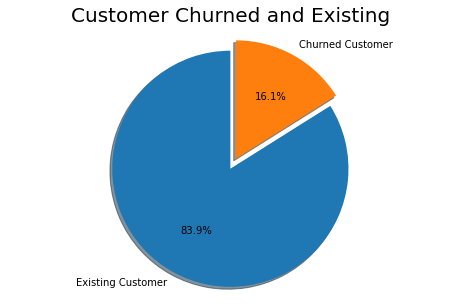

In [24]:
labels = 'Existing Customer', 'Churned Customer'
sizes = [ccattr_data.Attrition_Flag[ccattr_data['Attrition_Flag']==1].count(), 
         ccattr_data.Attrition_Flag[ccattr_data['Attrition_Flag']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Customer Churned and Existing", size = 20)
plt.show()

So about 16% of the customers have churned. Given 16% is a small number, we need to ensure that the chosen model does predict with great accuracy.

#### Distributions Of Feature Values<a id='Distributions_Of_Feature_Values'></a>

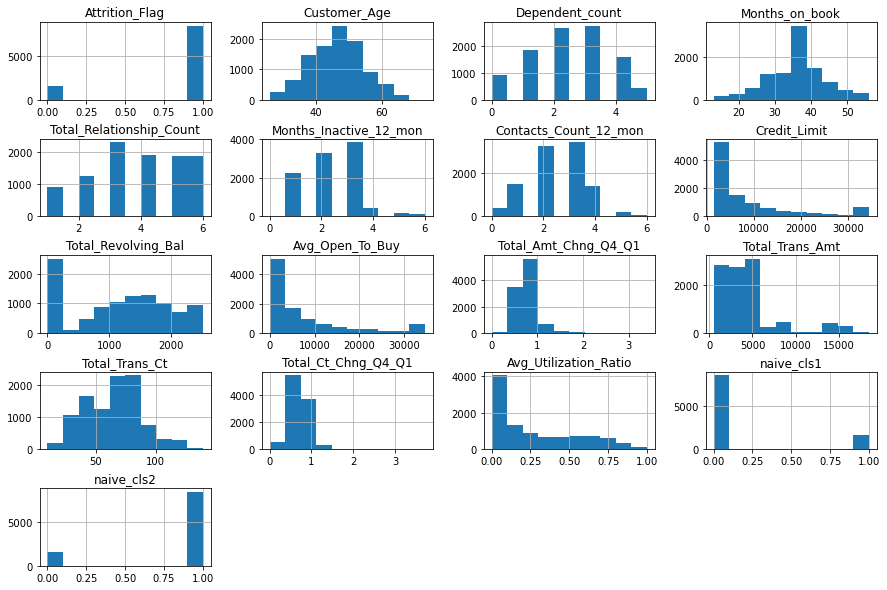

In [25]:
ccattr_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

Features have possible cause for concern about and why?
* naive_cls1- because values are clustered down the low end.
* naive_cls1- because values are clustered down the high end.

In [26]:
ccattr_data.drop(['naive_cls1'],axis=1,inplace=True)
ccattr_data.drop(['naive_cls2'],axis=1,inplace=True)

In [27]:
ccattr_data.shape

(10127, 20)

In [28]:
ccattr_data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

## Save data<a id='Save_data'></a>

Save this to your data directory, separately. Note that you were provided with the data in `raw_data` and you should saving derived data in a separate location. This guards against overwriting our original data.

In [29]:
# save the data to a new csv file
datapath = '../data'
save_file(ccattr_data, 'ccattr_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "../data\ccattr_data_cleaned.csv"


## Summary<a id='Summary'></a>

The dataset for this project is titled ‘ccattr_data’ and it is in Excel format and contains data types float64, int64, and object. The dataset has 10127 rows and 23 columns, with a total of 232,921 observations recorded. After completing the necessary modifications within this stage the final ccattr_data dataset contains 20 columns and 10127 rows, with a total of 202,540 observations remaining.Necessary modification is dropping the columns CLIENTNUM,naive_cls1,naive_cls2,Over all there is no missing values, however Education level and Marital status have unknown values.And Attrition_Flag is our target value.New CSV file is saved in data folder with the name "ccattr_data_cleaned.csv".